
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [4]:
!pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   ---------------------------------------- 198.9/198.9 kB 6.1 MB/s eta 0:00:00


In [16]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for plotting graphs and charts
import pylab # used for adding interactive features 
import pingouin as pg # used for statistical tests and data exploration

df_mh = pd.read_csv('MillerHadenData.csv')


In [17]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [18]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
missing_reading_iq = df_mh[['Abil', 'IQ']].isnull().any(axis=1).sum()
print(f"Number of participants missing data on either Abil or IQ: {missing_reading_iq}")


Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Number of participants missing data on either Abil or IQ: 0


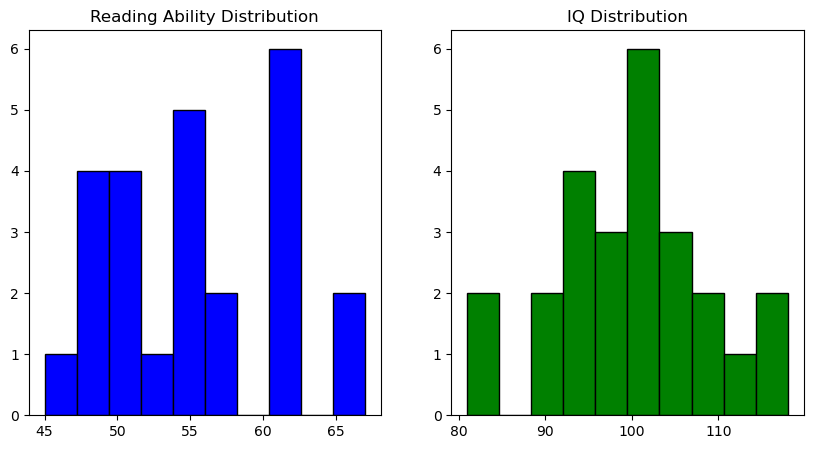

In [19]:
# Q1c (code):
# Check data distribution

# Import necessary library for plotting.
import matplotlib.pyplot as plt

# Plot histograms to visualize the distributions.
plt.figure(figsize=(10, 5))  # Set the size of the figure for better visibility.

# Histogram for Reading Ability
plt.subplot(1, 2, 1)  # First subplot
plt.hist(df_mh['Abil'], color='blue', edgecolor='black')
plt.title('Reading Ability Distribution')  # Add title to the histogram

# Histogram for IQ
plt.subplot(1, 2, 2)  # Second subplot
plt.hist(df_mh['IQ'], color='green', edgecolor='black')
plt.title('IQ Distribution')  # Add title to the histogram

# Display the plots
plt.show()

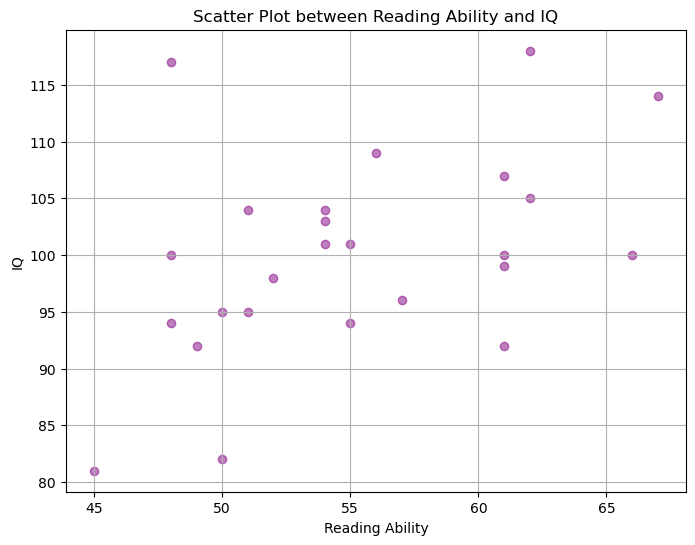

In [20]:
# Q1d (code):
# Scatter plot

# Q1d (code):
# Scatter plot between 'Reading Ability' and 'IQ'.

# Import necessary library for plotting.
import matplotlib.pyplot as plt

# Create a scatter plot with 'Reading Ability' 
plt.figure(figsize=(8, 6))  # Set figure size for better visibility
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='purple', alpha=0.5)  # Create scatter plot
plt.title('Scatter Plot between Reading Ability and IQ')  # Set title of the scatter plot
plt.xlabel('Reading Ability')  # Label x-axis
plt.ylabel('IQ')  # Label y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot


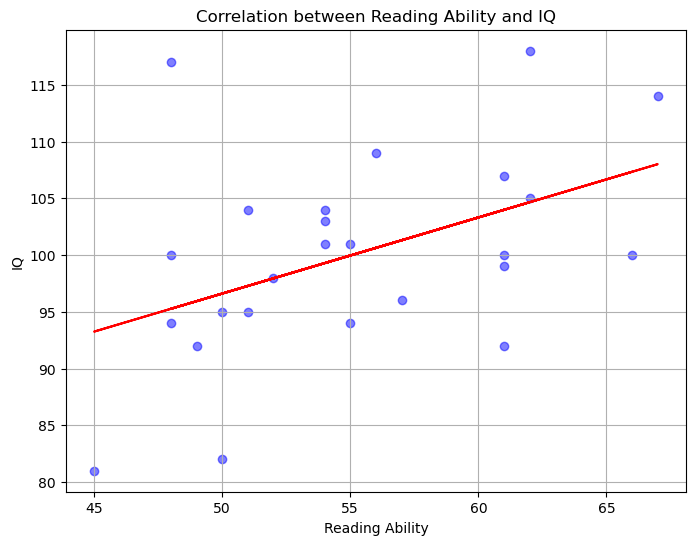

In [21]:
# Q1e (code):
# Correlation line

# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np

# Prepare data: 'Reading Ability' as X and 'IQ' as Y.
X = df_mh['Abil']
Y = df_mh['IQ']

# Calculate the best fit line (linear regression line).
m, b = np.polyfit(X, Y, 1)  # m is the slope, b is the intercept

# Create the scatter plot.
plt.figure(figsize=(8, 6))  
plt.scatter(X, Y, color='blue', alpha=0.5) 

# Add the correlation line.
plt.plot(X, m*X + b, color='red') 

# Customize the plot.
plt.title('Correlation between Reading Ability and IQ') 
plt.xlabel('Reading Ability')  # Label x-axis
plt.ylabel('IQ')  # Label y-axis
plt.grid(True)  # Add grid for better readability

# Display the plot.
plt.show()


**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [22]:
# Q2a (answer with words):

#Firstly, the scatter plot between 'Abil' and 'IQ' shows a collection of points that suggest a linear relationship between the two variables. 

#Secondly, Pearson is best used when both variables of interest are normally distributed and the relationship between the variables is linear

#So, I choose Pearson

In [23]:
# Q2b (code):

# Conduct a correlation coefficient test.
# Calculate the Pearson correlation coefficient between 'Reading Ability' and 'IQ' using scipy.stats.
pearson_corr, pearson_p = stats.pearsonr(df_mh['Abil'], df_mh['IQ'])

# Display the results of the Pearson correlation test.
print(f"Pearson correlation coefficient: {pearson_corr}, P-value: {pearson_p}")

# c. Interpret the result.
# Determine the direction of the association based on the correlation coefficient.
if pearson_corr > 0:
    direction = 'positive'  # A positive value indicates a positive relationship.
else:
    direction = 'negative'  # A negative value indicates a negative relationship.

# Assess the strength of the association based on the absolute value of the correlation coefficient.
if abs(pearson_corr) < 0.2:
    strength = 'very weak'
elif abs(pearson_corr) < 0.4:
    strength = 'weak'
elif abs(pearson_corr) < 0.6:
    strength = 'moderate'
elif abs(pearson_corr) < 0.8:
    strength = 'strong'
else:
    strength = 'very strong'

# Print the interpretation of the direction and strength of the association.
print(f"The direction of the association between 'Reading Ability' and 'IQ' is {direction}.")
print(f"The strength of this association is considered to be {strength}.")

# Determine the statistical significance based on the P-value.
print(f"The association is {'not statistically significant' if pearson_p >= 0.05 else 'statistically significant'}.")


Pearson correlation coefficient: 0.45116993876507616, P-value: 0.02359260883361456
The direction of the association between 'Reading Ability' and 'IQ' is positive.
The strength of this association is considered to be moderate.
The association is statistically significant.


In [24]:
# Q2c (answer with words):

#The Pearson correlation coefficient is 0.451, indicating a positive correlation between reading ability and intelligence.

#The coefficient value of 0.451 reflects the moderate correlation strength between the two variables.

#The p-value associated with this correlation is 0.024, which is lower than the traditional alpha level of 0.05.

#There is a statistically significant and moderate positive correlation between reading ability and intelligence. Although this association is significant, it is not very strong.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [25]:
# Q3a (answer in words):
# H0: There is no association between reading ability levels (divided into 'low' and 'high' based on the average) and the frequency of reading at home (categorized as 'infrequent' and 'frequent' based on the average).
# H1：There is an association between reading ability levels and the frequency of reading at home.

In [26]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for ....
from scipy.stats import chi2_contingency ##used for ....

# Define the rounded average for Reading Ability and Home
average_abil = round(df_mh['Abil'].mean()) 
average_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['low' if abil <= average_abil else 'high' for abil in df_mh['Abil']]

# Create the Rank_Home column
df_mh['Rank_Home'] = ['infrequent' if home <= average_home else 'frequent' for home in df_mh['Home']]

# Display the first few rows of the updated dataframe.
print(df_mh.head())


   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      high    frequent
1            2    56  109   123  608      high  infrequent
2            3    45   81   108  640       low  infrequent
3            4    66  100   155  493      high    frequent
4            5    49   92   103  636       low  infrequent


In [27]:
# Q3c (code):
# Construct Contingency Matrix

contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the Contingency Matrix.
print(contingency_matrix)

Rank_Home  frequent  infrequent
Rank_Abil                      
high              8           2
low               3          12


In [28]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_matrix)

# Display the results of the Chi-square test.
print(f"Chi-square Statistic: {chi2}, P-value: {p_value}")

Chi-square Statistic: 6.500270562770561, P-value: 0.010785807794066234


In [29]:
# Q3e (answer in words):
#The chi square statistic is 6.50 with a p-value of 0.011, indicating that we can reject the null hypothesis (H0) 

#This means that there is a statistically significant correlation between reading ability ("Rank Abil") and reading time at home ("Rank Home").

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [30]:

import pandas as pd # used for data manipulation and analysis
from scipy import stats # used for performing statistical tests
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt # used for creating static, interactive, and animated visualizations
import seaborn as sns # used for making statistical graphics

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [31]:
# Q4a (code):
# Calculate mean and standard deviation for age

import numpy as np

mean_age = np.mean(df_evaluators['age'].dropna())
print(f"Mean age of evaluators: {mean_age}")

std_age = np.std(df_evaluators['age'].dropna(), ddof=1)  
print(f"Standard deviation of age of evaluators: {std_age}")


Mean age of evaluators: 30.852941176470587
Standard deviation of age of evaluators: 6.238358141327351


In [32]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

# Count the number of male (1) and female (2) evaluators
gender_counts = df_evaluators['sex'].value_counts() 

print(f"Number of male evaluators: {gender_counts.get(1, 0)}") 
print(f"Number of female evaluators: {gender_counts.get(2, 0)}")

Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [33]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [34]:
# Q5 (code):

# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
mean_intellect = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
mean_intellect.reset_index(drop=True, inplace=True)

# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([mean_intellect, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators, on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [35]:
# Q6a (answer in words):
# Null hypothesis: There is no significant difference in the mean ratings (for Intellect, Hire, and Impression) between evaluators who listened to the pitches and those who read them. 

# Alternative hypothesis: There is a significant difference in the mean ratings (for Intellect, Hire, and Impression) between evaluators who listened to the pitches and those who read them. 

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [36]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

#Two-tail, because I want to see if there is a significant difference in ratings between the evaluators who listened to pitches and those who read them, without a predefined notion of which group would give higher or lower ratings.

In [37]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

#Independent variable: listened to the pitches (listened) and read the pitches (read)

#Dependent variable: Intellect, Hire, and Impression



To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [40]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].agg(['mean', 'std', 'count']).reset_index()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ['intellect', 'hire', 'impression']:
    for condition in ['listened', 'read']:
        # Selecting ratings for a specific category and condition
        sample = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == condition)]['Rating']
           # Performing Shapiro-Wilk test
        shapiro_results[f'{category}_{condition}'] = shapiro(sample)

# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ['intellect', 'hire', 'impression']:
    # Retrieving ratings for listened and read conditions
    sample_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    sample_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    # Performing Levene's test for equality of variances
    levene_results[category] = levene(sample_listened, sample_read)

# Independent t-tests
ttest_results = {}
for category in ['intellect', 'hire', 'impression']:
    # Retrieving ratings for listened and read conditions
    sample_listened = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    sample_read = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    # Performing independent t-tests
    ttest_results[category] = ttest_ind(sample_listened, sample_read)

#ratings_desc, shapiro_results, levene_results, ttest_results

print("Descriptive Analysis Results:\n", ratings_desc)

print("\nShapiro-Wilk Normality Test Results:")
for key, value in shapiro_results.items():
    print(f"{key}: Statistic={value[0]}, p-value={value[1]}")

print("\nLevene's Test for Homogeneity of Variances Results:")
for key, value in levene_results.items():
    print(f"{key}: Statistic={value[0]}, p-value={value[1]}")

print("\nIndependent t-Test Results:")
for key, value in ttest_results.items():
    print(f"{key}: Statistic={value[0]}, p-value={value[1]}")


Descriptive Analysis Results:
      Category condition      mean       std  count
0        hire  listened  4.714286  2.261479     21
1        hire      read  2.888889  2.054805     18
2  impression  listened  5.968254  1.917477     21
3  impression      read  4.074074  2.233306     18
4   intellect  listened  5.634921  1.608674     21
5   intellect      read  3.648148  1.911343     18

Shapiro-Wilk Normality Test Results:
intellect_listened: Statistic=0.9350408315658569, p-value=0.17365092039108276
intellect_read: Statistic=0.9512398838996887, p-value=0.4447984993457794
hire_listened: Statistic=0.9390669465065002, p-value=0.20883114635944366
hire_read: Statistic=0.9034496545791626, p-value=0.06600592285394669
impression_listened: Statistic=0.9394754767417908, p-value=0.21275967359542847
impression_read: Statistic=0.9483764171600342, p-value=0.40011918544769287

Levene's Test for Homogeneity of Variances Results:
intellect: Statistic=0.8980185752566812, p-value=0.34946205893248505
hire:

In [ ]:
#Q7b (answer in words): 

#Descriptive analysis: Evaluators gave higher average ratings for 'listened' compared to 'read' across all categories: Intellect, Hire, and Impression. This suggests a general preference or perceived higher quality in the listened-to pitches.

#Shapiro-Wilk Test: All p-values exceeded 0.05, indicating that ratings for each condition within each category follow a normal distribution. This justifies the use of parametric tests like the independent t-test for further analysis.

#Levene's Test: With all p-values above 0.05, there's no significant variance difference between listened and read conditions within each category. This confirms that the assumption of equal variances, required for independent t-tests, is met.

#Independent t-Tests: Significant p-values (below 0.05) in Intellect, Hire, and Impression categories indicate that there are statistically significant differences in ratings between listened and read conditions. Specifically, listened-to pitches were rated higher than read pitches.

#Reasons: Because the use of Shapiro-Wilk and Levene’s tests can ensure that the data meets the assumptions for conducting independent t-tests. The significant results from the t-tests reveal that the mode of pitch presentation (listened vs. read) significantly influences evaluators' ratings. 
